In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [56]:
train=pd.read_csv("train.csv")

In [57]:
colnames=train.columns

In [58]:
[col for col in colnames if col.startswith("Curricular")]

['Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)']

In [59]:
X=train.drop(columns=['Target'])
y=train['Target']

In [60]:
def transforma(df):
    # Tiro la columna id, course en train
    
    df=df.drop(columns=['id','Course'])
    # realmente no hace falta tirarlas aqui
    
    # aqui hago nuevas columnas
    colnames=df.columns
    curricular_columns=[col for col in colnames if col.startswith("Curricular units")]
    df['UnitsCredited']=df['Curricular units 1st sem (credited)']+df['Curricular units 2nd sem (credited)']
    df['UnitsEnrolled']=df['Curricular units 1st sem (enrolled)']+df['Curricular units 2nd sem (enrolled)']
    df['UnitsEvaluations']=df['Curricular units 1st sem (evaluations)']+df['Curricular units 2nd sem (evaluations)']
    df['UnitsApproved']=df['Curricular units 1st sem (approved)']+df['Curricular units 2nd sem (approved)']
    df['UnitsWithoutEval']=df['Curricular units 1st sem (without evaluations)']+df['Curricular units 2nd sem (without evaluations)']
    df['MeanGrade']=(df['Curricular units 1st sem (grade)']+df['Curricular units 2nd sem (grade)'])/2
    
    # combino nuevas columnas
    df['TotalUnits']=df['UnitsCredited']+df['UnitsEnrolled']+df['UnitsApproved']
    df['PercCredited']=df['UnitsCredited']/df['TotalUnits']
    df['PercEnrolled']=df['UnitsEnrolled']/df['TotalUnits']
    df['PercApproved']=df['UnitsApproved']/df['TotalUnits']
    new_columns=["UnitsCredited","UnitsEnrolled","UnitsEvaluations","UnitsApproved","UnitsWithoutEval","MeanGrade","TotalUnits","PercCredited","PercEnrolled","PercApproved"]
     # hay NA cuando TotalUnits == 0, subsituyo los nans por 0
    df = df.replace(np.nan,0)

    # me quedo con las columnas que he trabajado
    data = df[["MeanGrade","TotalUnits"]]
    return data

In [61]:
X=transforma(X)


In [62]:
X.head()

,MeanGrade,TotalUnits
0,13.464286,24
1,5.800000,16
2,0.000000,12
3,12.705625,29
4,12.933333,26


## Polynomial features

**fit_transform**

$
\begin{bmatrix}
    v_1 & w_1\\ 
    v_2 & w_2\\ 
    \vdots\\
    v_n & w_n
\end{bmatrix}
$
$\longrightarrow$
$
\begin{bmatrix}
    [ v_1 & v_1^2 &]\\
    [ v_2 & v_2^2 &]\\
     \vdots & \vdots\\
    [ v_n & v_n^2 &]
\end{bmatrix}
$

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [64]:
# hago el preprocesamiento en el X_train
from sklearn.preprocessing import PolynomialFeatures
objeto_poly = PolynomialFeatures(degree=2, # grado del polinomio
                                    include_bias=False, # si hace la columna de constante 1
                                    interaction_only=False) # si solo hace multiplicaciones entre variables
objeto_poly.fit(X_train)

PolynomialFeatures(include_bias=False)

In [65]:
objeto_poly.transform(X_train)


array([[ 11.725   ,  21.      , 137.475625, 246.225   , 441.      ],
       [  0.      ,  10.      ,   0.      ,   0.      , 100.      ],
       [  0.      ,  12.      ,   0.      ,   0.      , 144.      ],
       ...,
       [  0.      ,  12.      ,   0.      ,   0.      , 144.      ],
       [ 11.9     ,  22.      , 141.61    , 261.8     , 484.      ],
       [  5.5     ,  11.      ,  30.25    ,  60.5     , 121.      ]])

In [77]:
objeto_poly.get_feature_names_out()

array(['MeanGrade', 'TotalUnits', 'MeanGrade^2', 'MeanGrade TotalUnits',
       'TotalUnits^2'], dtype=object)

In [78]:

nombre_columnas = objeto_poly.get_feature_names_out()

In [79]:
X_train[nombre_columnas] = objeto_poly.transform(X_train)
# aqui no hace falta tirarlas porque las sobreescrivo

In [80]:
X_train.head()

,MeanGrade,TotalUnits,MeanGrade^2,MeanGrade TotalUnits,TotalUnits^2
53841,11.72500,21.0,137.475625,246.2250,441.0
1739,0.00000,10.0,0.000000,0.0000,100.0
49148,0.00000,12.0,0.000000,0.0000,144.0
35687,14.76875,30.0,218.115977,443.0625,900.0
49265,11.82500,21.0,139.830625,248.3250,441.0


## Regularización

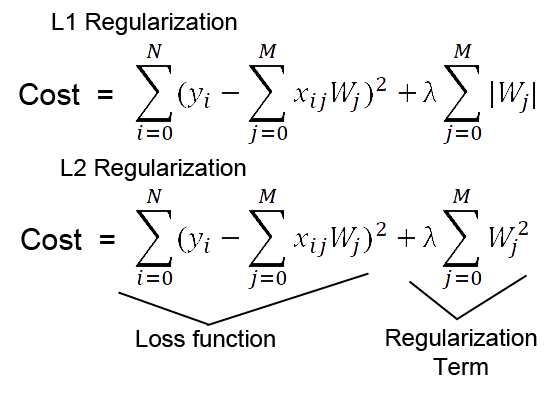

In [ ]:
# Para regresión
# Lasso = L1 => valor absoluto de los parametros
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
# Ridge = L2 => valor al cuadrado de los parametros
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge
# ElasticNet = L1+L2
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet

In [81]:
clf=LogisticRegression(max_iter=10000, 
                       C=0.1, # smaller values specify stronger regularization.
                       penalty="l2") #‘l1’, ‘l2’, ‘elasticnet’
clf.fit(X_train,y_train)

LogisticRegression(C=0.1, max_iter=10000)

In [82]:
yhat_train = clf.predict(X_train)
accuracy_score(y_train,yhat_train)

0.7656192092379114

In [84]:
X_test[nombre_columnas]=objeto_poly.transform(X_test)

In [85]:
X_test.head()

,MeanGrade,TotalUnits,MeanGrade^2,MeanGrade TotalUnits,TotalUnits^2
73069,14.500000,24.0,210.250000,348.000000,576.0
10017,12.208333,22.0,149.043403,268.583333,484.0
48811,13.000000,20.0,169.000000,260.000000,400.0
18643,10.000000,13.0,100.000000,130.000000,169.0
57123,13.000000,24.0,169.000000,312.000000,576.0


In [86]:
yhat_test=clf.predict(X_test)
accuracy_score(y_test,yhat_test)

0.7592570591263712

In [87]:
clf

LogisticRegression(C=0.1, max_iter=10000)

# Pipeline rapido

In [44]:
from sklearn.pipeline import make_pipeline

In [88]:
objeto_poly = PolynomialFeatures(degree=2, # grado del polinomio
                                    include_bias=False, # si hace la columna de constante 1
                                    interaction_only=False) # si solo hace multiplicaciones entre variables

In [89]:
clf = LogisticRegression(max_iter=10000, 
                       C=0.1, # smaller values specify stronger regularization.
                       penalty="l2" ) #‘l1’, ‘l2’, ‘elasticnet’

In [90]:
complete_process = make_pipeline(objeto_poly, clf)
# podriamos meter mas objetos "transformadores"
# complete_process = make_pipeline(imputer, objeto_poly, scaler, clf)

In [92]:
complete_process

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('logisticregression',
                 LogisticRegression(C=0.1, max_iter=10000))])

In [91]:
X.head()

,MeanGrade,TotalUnits
0,13.464286,24
1,5.800000,16
2,0.000000,12
3,12.705625,29
4,12.933333,26


In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

complete_process.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('logisticregression',
                 LogisticRegression(C=0.1, max_iter=10000))])

In [94]:
# con una linea ejecutamos todo
# predict = transform
yhat_test = complete_process.predict(X_test)

## Una vez tengamos un modelo, hay que repetir el preprocesamiento a test (al conjunto que sirve para hacer una submission)

In [95]:
test=pd.read_csv("test.csv")
submission=pd.read_csv("sample_submission.csv")


In [96]:
test = transforma(test)

In [97]:
yhat_submission = complete_process.predict(test)

In [98]:
submission.Target = yhat_submission
submission.head()

,id,Target
0,76518,Dropout
1,76519,Graduate
2,76520,Graduate
3,76521,Graduate
4,76522,Enrolled


In [54]:
submission.to_csv("submission.csv",index=False)